
## 🧑‍🤝‍🧑 **Clustering**

In this notebook, we will apply the **clustering** process, an **unsupervised learning** technique used to group similar objects within a dataset. The goal is to identify patterns and divide the data into clusters (groups) without needing predefined labels.

To achieve optimal performance and high model accuracy, we will perform pre-processing steps, such as **dimensionality reduction**, on the data.


In [1]:
import pandas as pd

DATA = "../data/Customers_new_features_and_drop.csv"

df = pd.read_csv(DATA)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57.0,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60.0,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49.0,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30.0,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33.0,31-45,422,407,1,1,0,0,14


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i


### **Separating Columns for Different Types of Scalers**

In the data pre-processing stage, it is essential to choose the appropriate methods to efficiently transform numerical and categorical columns. There are various **pre-processing** techniques that help standardize and scale the data correctly.

🔗 **Useful References:**
- [Scikit-Learn: Preprocessing Module](https://scikit-learn.org/stable/modules/preprocessing.html)  
- [Importance of Normalization and Standardization](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)  
- [Comparison of Different Scaling Methods](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)  
- [Mapping Data to a Normal Distribution](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)  


In [3]:
numerical_features = df.select_dtypes(include="number").columns
numerical_features

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DaysSinceEnrolled',
       'YearsSinceEnrolled', 'Age', 'MntTotal', 'MntRegularProds', 'Children',
       'HasChildren', 'AcceptedCmpTotal', 'HasAcceptedCmp',
       'NumTotalPurchases'],
      dtype='object')

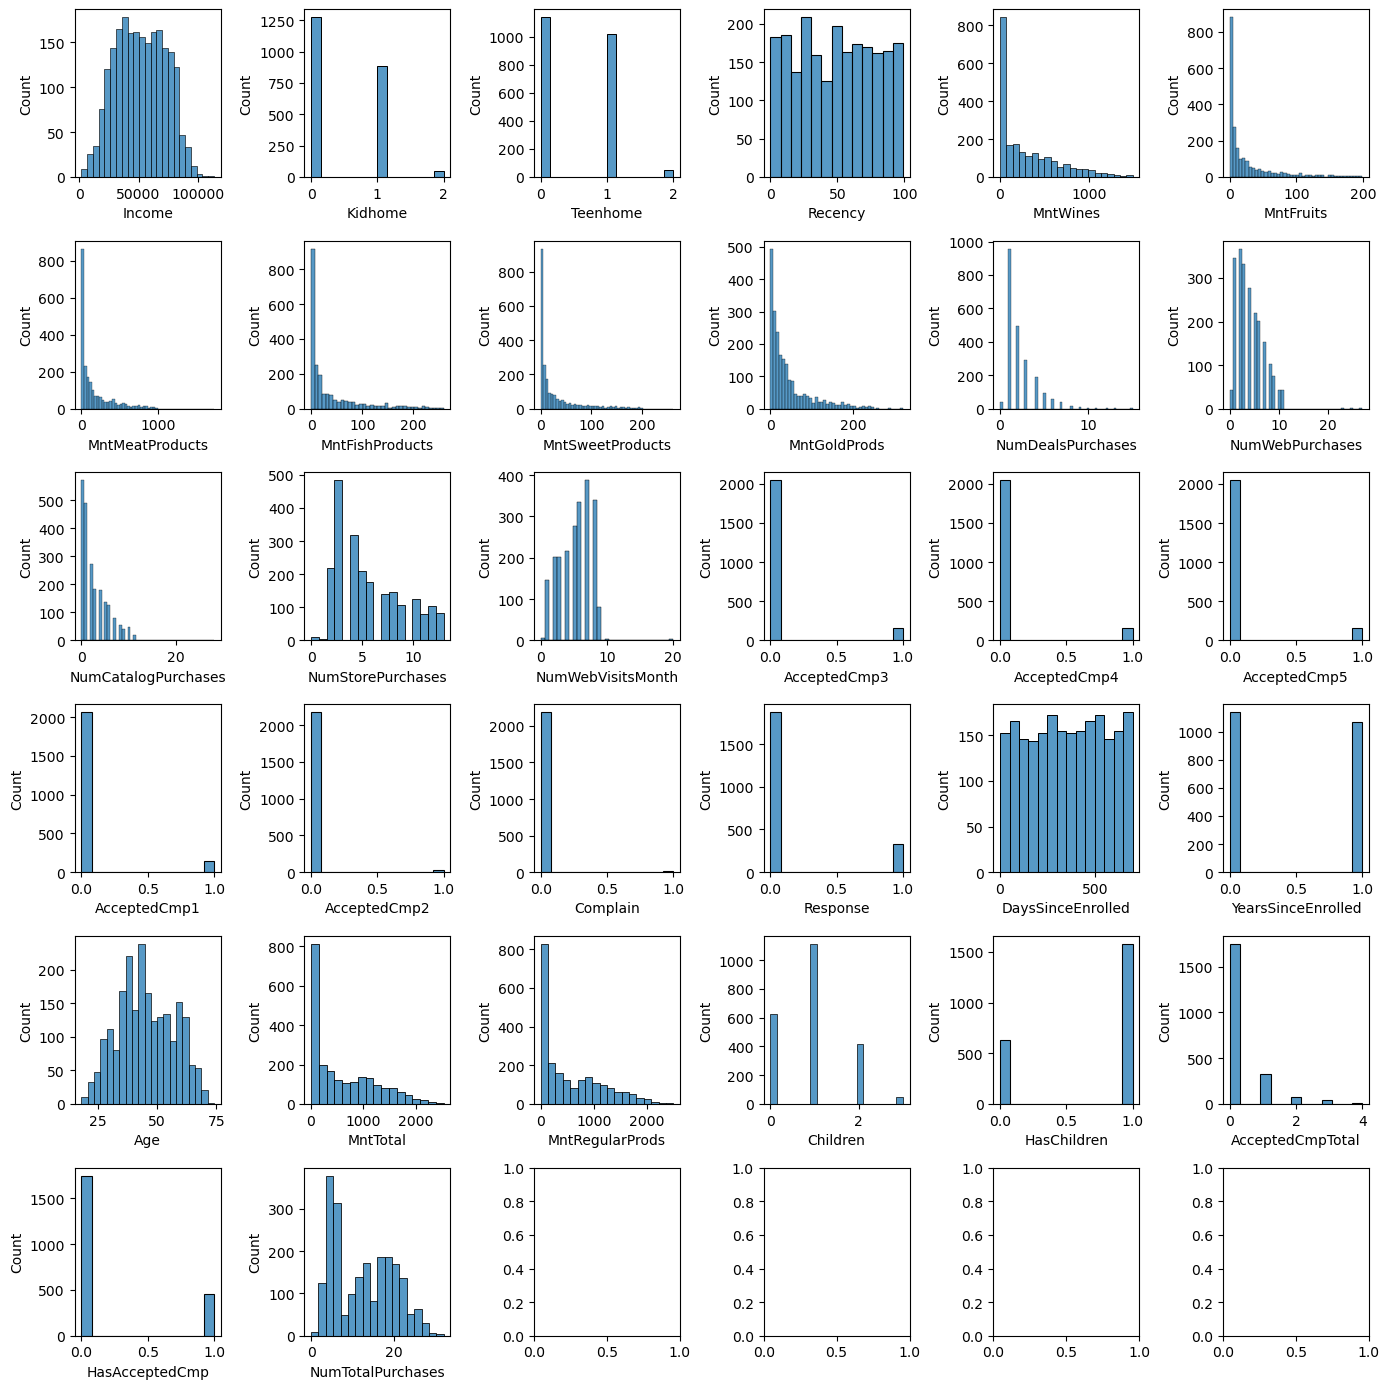

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(ax.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df)
plt.show()

In [5]:
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren", 
    "HasAcceptedCmp", 
    "AcceptedCmp2", 
    "AcceptedCmp3", 
    "AcceptedCmp4", 
    "AcceptedCmp5", 
    "Complain", 
    "Response", 
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal"
]

standard_cols = [
    "Income",
    "Age"
]

power_cols = df.columns[
    df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()

minmax_cols = [
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [6]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import  ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols)
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31554348,
         1.3107051 ,  1.22117404],
       [ 0.        ,  0.        ,  1.        , ..., -1.44715317,
        -1.45392396, -1.31943784],
       [ 0.        ,  0.        ,  1.        , ...,  0.65850681,
         0.68796397,  1.02538786],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.06873119,
         1.10901986,  0.81760731],
       [ 0.        ,  0.        ,  0.        , ...,  0.72839023,
         0.73883475,  1.12466774],
       [ 0.        ,  0.        ,  0.        , ..., -0.44741865,
        -0.42493797, -0.5090171 ]])

In [7]:
preprocessing.get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__AgeGroup_18-30',
       'one-hot__AgeGroup_31-45', 'one-hot__AgeGroup_46-60',
       'one-hot__AgeGroup_61+', 'one-hot__HasChildren_0',
       'one-hot__HasChildren_1', 'one-hot__HasAcceptedCmp_0',
       'one-hot__HasAcceptedCmp_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Response_0',
       'one-hot__Response_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0', 'one-hot__Teenhome_1',
       'one-hot__Teenhome_2', 'one-hot__Yea

In [8]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns = preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__AgeGroup_18-30,one-hot__AgeGroup_31-45,one-hot__AgeGroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.387173,1.089046,0.753752,1.332973,1.747828,-0.425453,0.700269,1.315543,1.310705,1.221174
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.976308,-0.947497,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.447153,-1.453924,-1.319438
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.546813,0.442997,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.658507,0.687964,1.025388
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.525155,-1.052464,0.160834,-0.726457,-1.341911,-0.425453,0.300240,-1.123214,-1.066232,-0.877589
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.694250,-0.350932,1.453779,0.521339,0.518935,0.278071,-0.108417,0.175065,0.238799,0.356875



### **Defining the Number of Clusters**

We define the number of clusters to be used in the model based on two methods:

- **Elbow Method** → Evaluates the variability within clusters (finds K by identifying the "elbow").
- **Silhouette Method** → Measures the cohesion and separation between clusters (finds K by the highest score).


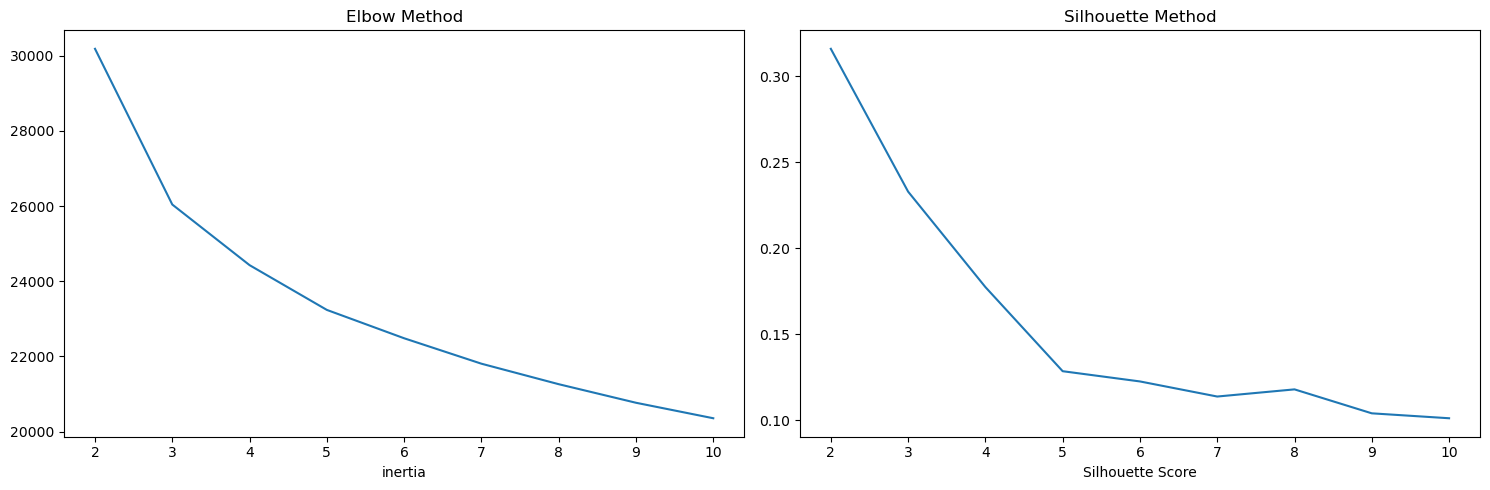

In [9]:
from auxiliary_functions import plot_elbow_silhouette

plot_elbow_silhouette(df_scaled)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', StandardScaler(),
                                                  [...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [11]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57.0,46-60,1617,1529,0,0,0,0,22,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60.0,46-60,27,21,2,1,0,0,4,0
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49.0,46-60,776,734,0,0,0,0,20,1
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30.0,18-30,53,48,1,1,0,0,6,0
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33.0,31-45,422,407,1,1,0,0,14,2


In [12]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    895
1    568
2    742
Name: count, dtype: int64


### **Analyzing the Clusters**

We select the columns of interest to analyze how they behave within each cluster.


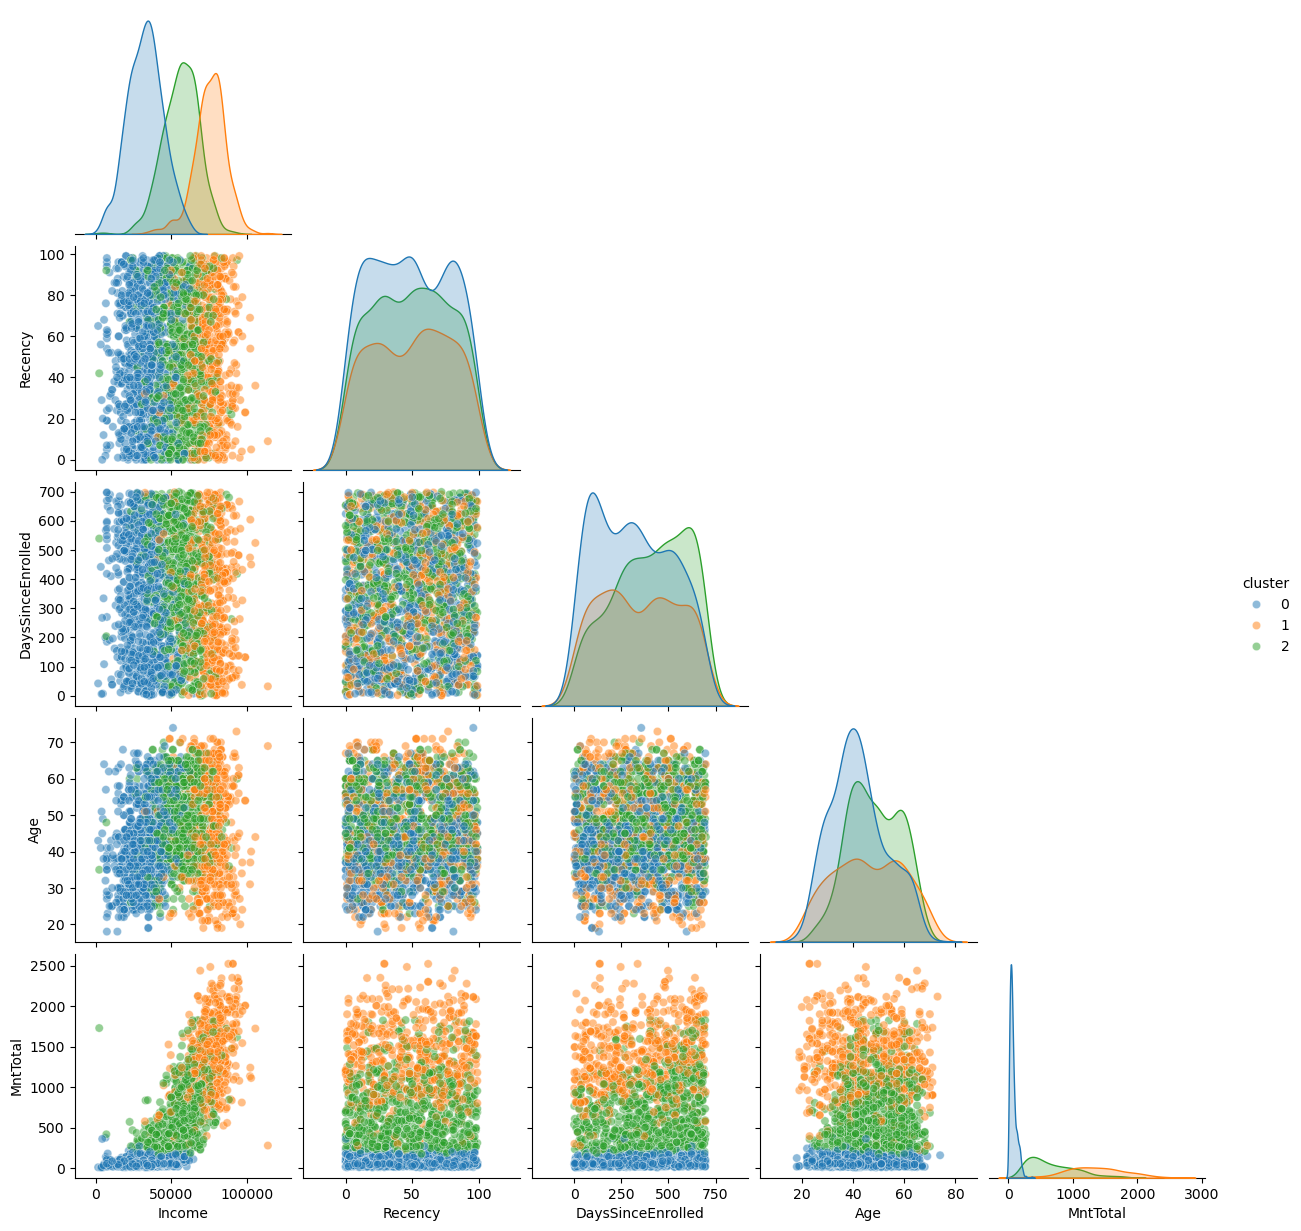

In [13]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")



## **Analyzing Columns in Relation to the Clusters**

We analyze how the selected columns behave and correlate with each of the clusters to better understand the patterns within each group.



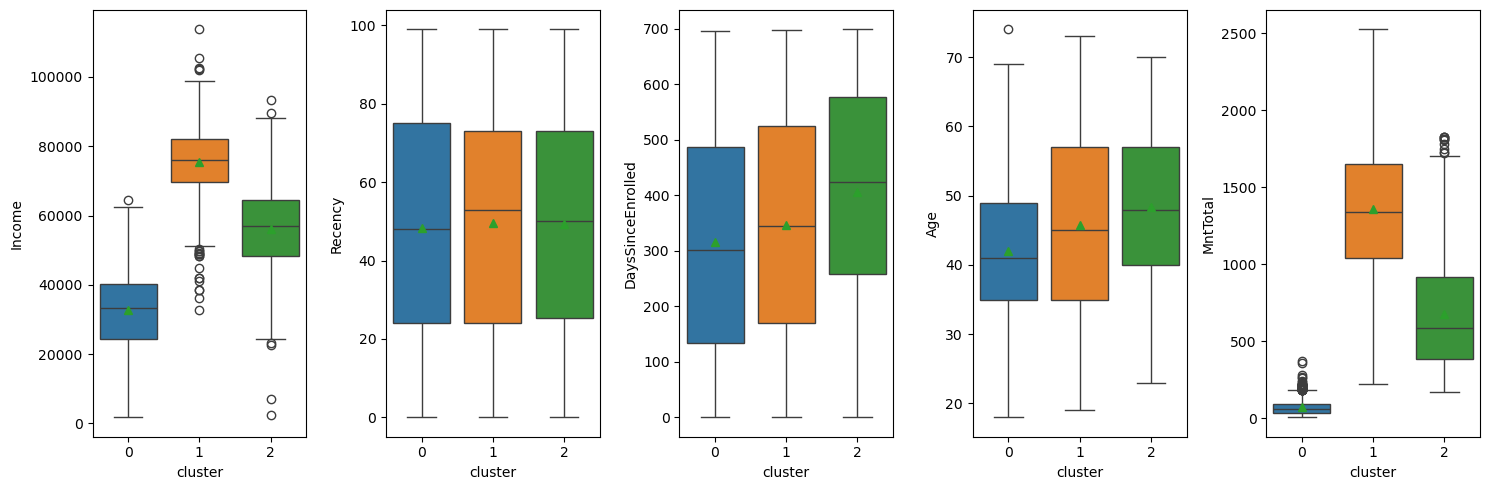

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="cluster", y=col, data=df_clustered, ax=ax, showmeans=True, hue="cluster", palette="tab10", legend=False)

In [15]:
columns = [
    "HasChildren",
    "Marital_Status",
    "Education",
    "HasAcceptedCmp",
    "Response",
    "YearsSinceEnrolled",
]

cluster_diff_cols = ["MntTotal", "Income"]

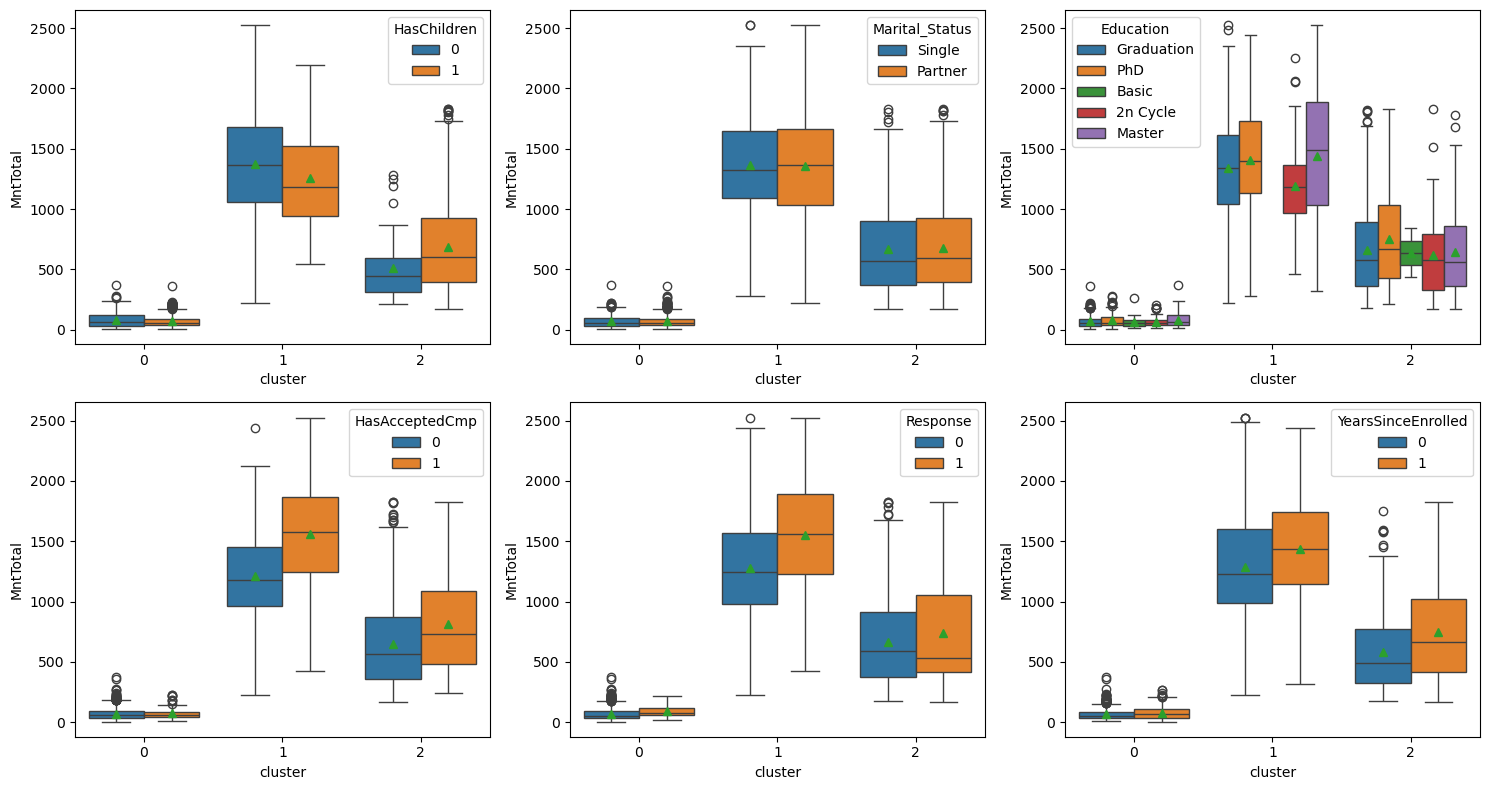

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[0],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

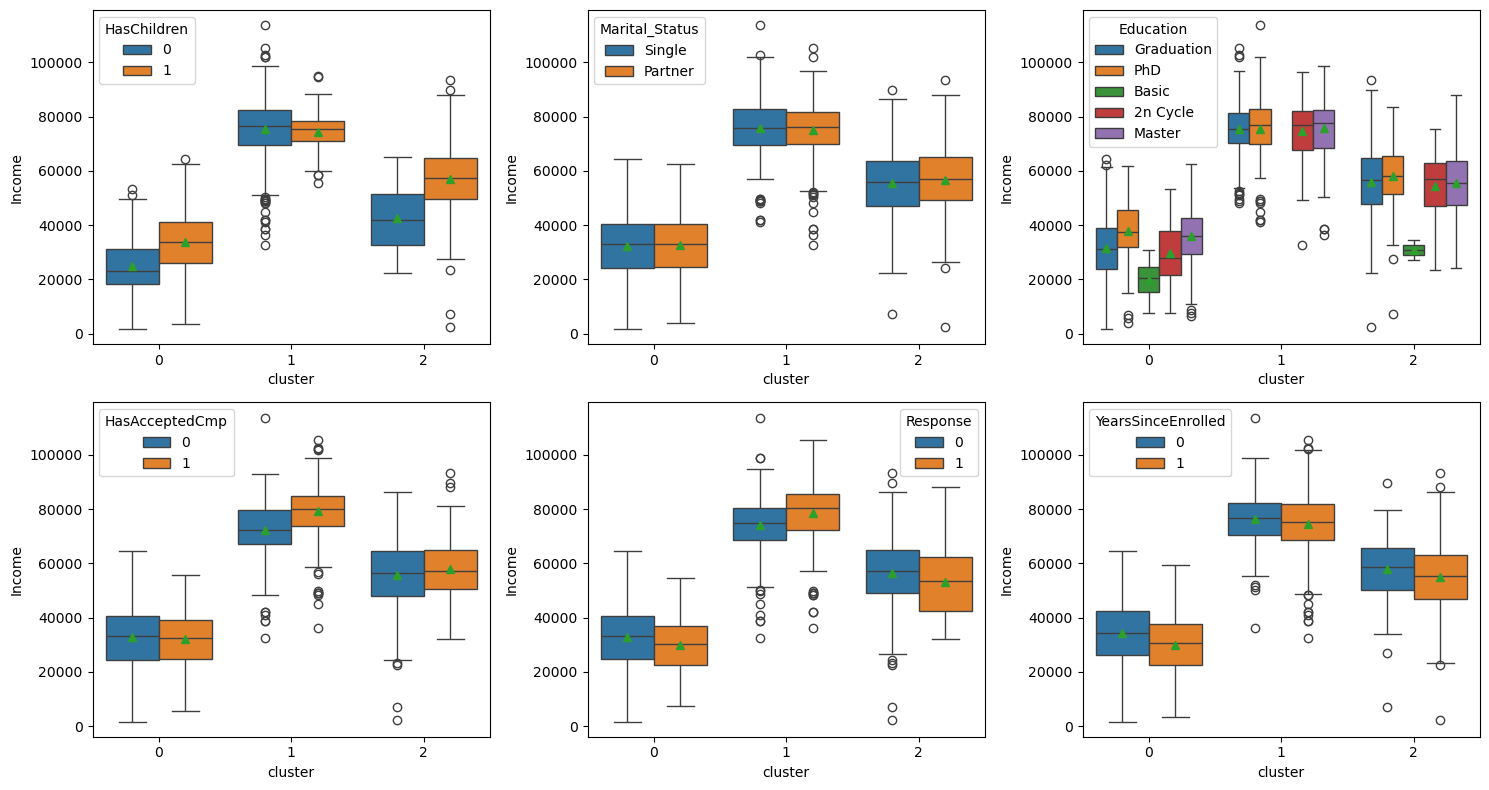

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[1],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

C:\Users\cross\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


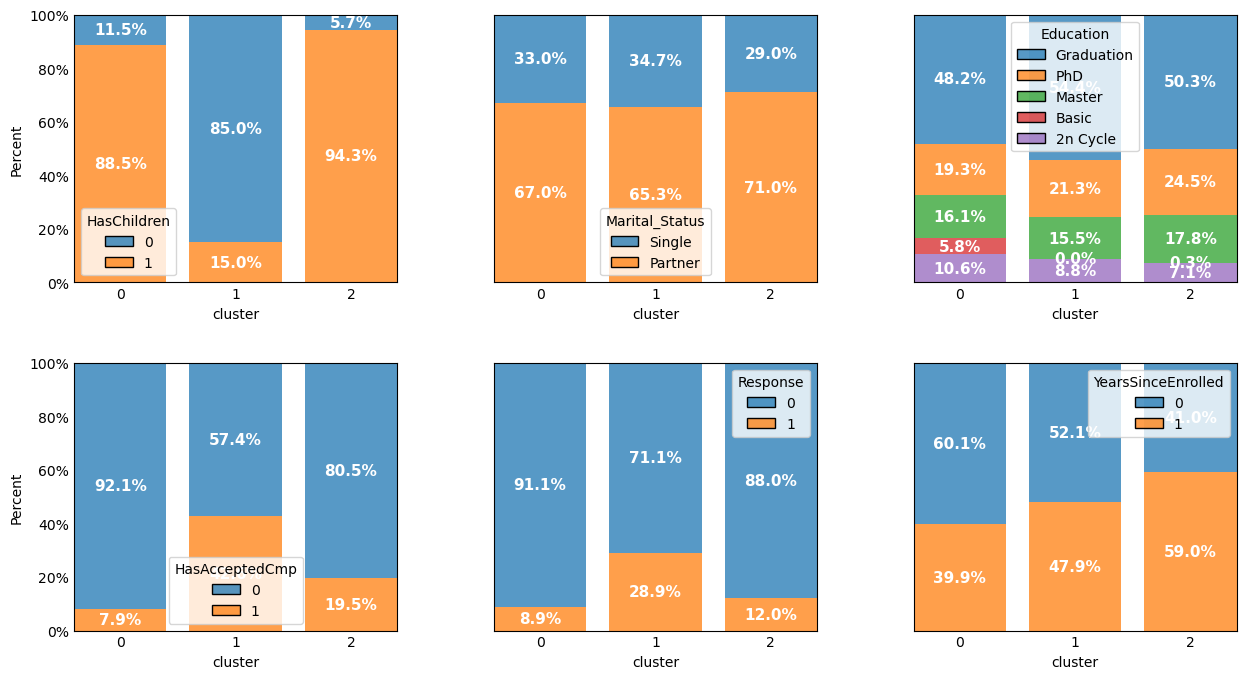

In [18]:
from auxiliary_functions import plot_columns_percent_by_clusters

plot_columns_percent_by_clusters(
    dataframe=df_clustered,
    columns=columns,
)

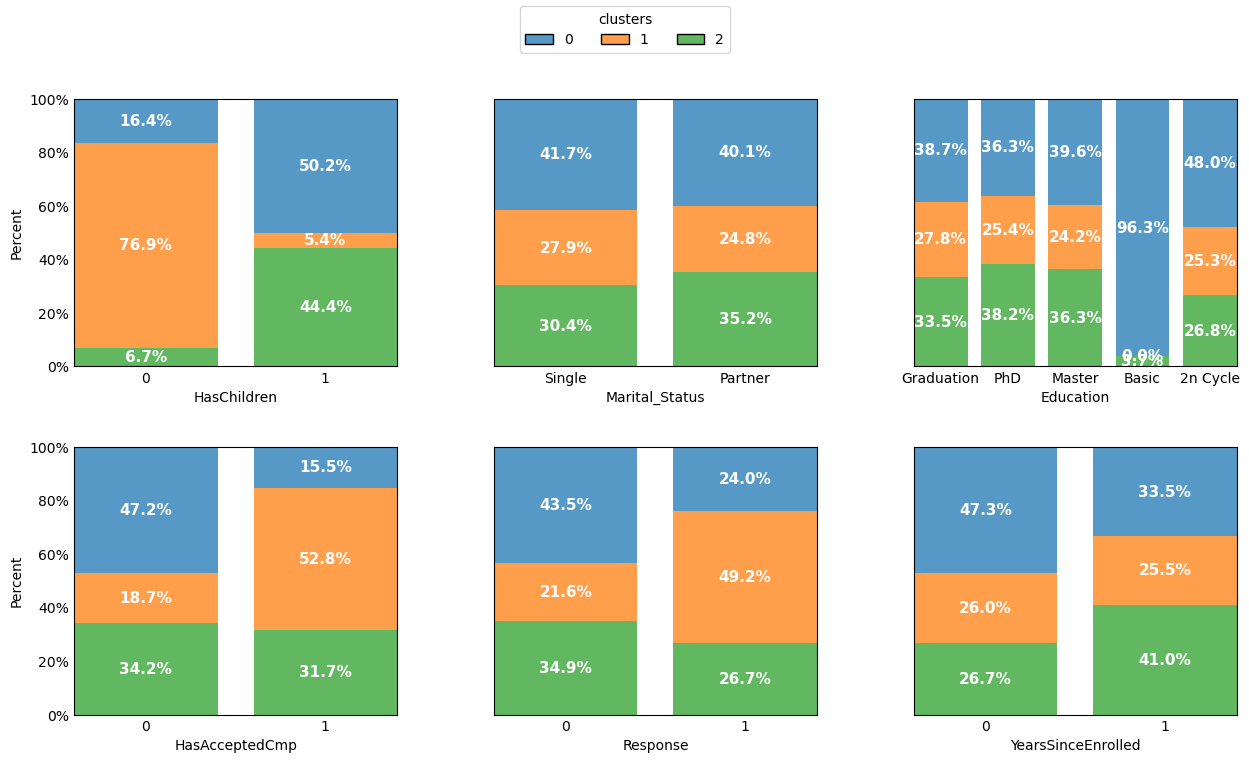

In [19]:
from auxiliary_functions import plot_columns_percent_hue_clusters

plot_columns_percent_hue_clusters(
    dataframe=df_clustered,
    columns=columns
)

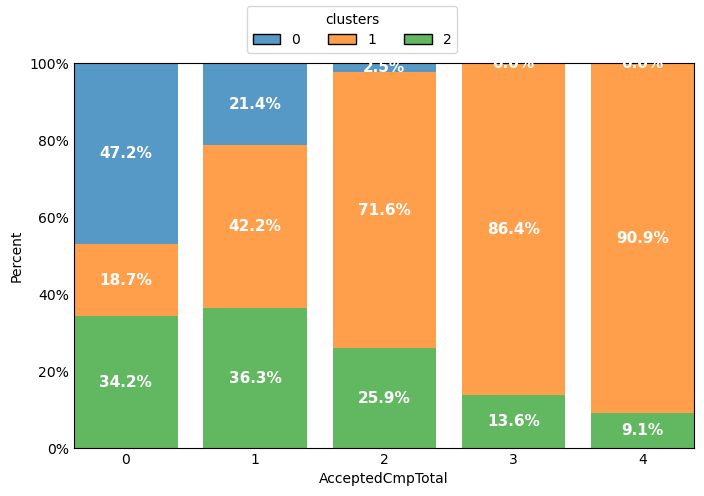

In [20]:
plot_columns_percent_hue_clusters(
    dataframe=df_clustered,
    columns=["AcceptedCmpTotal"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

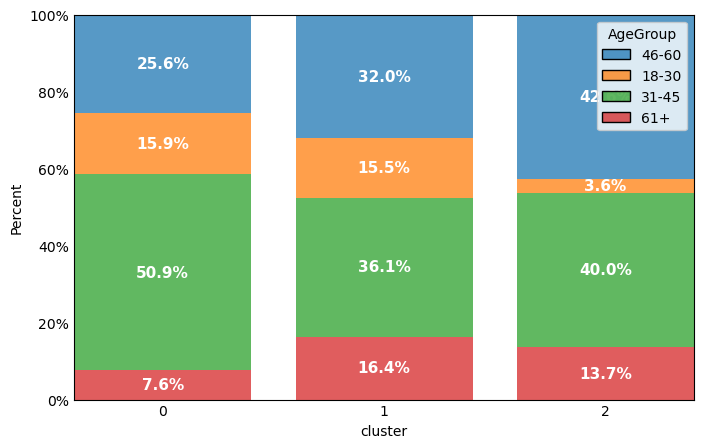

In [21]:
plot_columns_percent_by_clusters(
    dataframe=df_clustered,
    columns=["AgeGroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

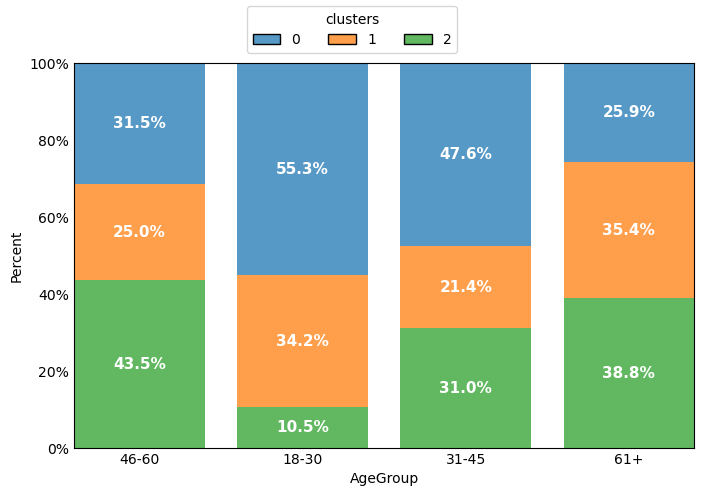

In [22]:
plot_columns_percent_hue_clusters(
    dataframe=df_clustered,
    columns=["AgeGroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)


**Analysis by Group (Cluster):**

**Group 0:**  
- People with high income and high spending  
- Almost no one in this group has children  
- They are more likely to accept marketing campaigns  
- No one in this group has a basic education level  
- Age is quite varied, with no clear pattern  

**Group 1:**  
- People with lower income and low spending  
- Likely to have children  
- Low chance of being interested in campaigns  
- This is the only group with a significant number of people with basic education  
- Most people in this group are younger  

**Group 2:**  
- Average income and spending, neither too high nor too low  
- Likely to have children as well  
- May accept campaigns, but not guaranteed  
- People in this group tend to be older  
